In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('houses.txt', sep=" ", header=None)
df.columns = ["LP","MHV","MINC","HAGE","TROOMS","TBEDR","POP","HHDS","LATI","LONGI"]
df = df.drop('LP', 1)

In [3]:
df2 = df[['MINC', 'HAGE', 'TROOMS', 'TBEDR', 'POP', 'HHDS', 'LATI', 'LONGI']]

In [4]:
explain_value = df['MHV'] 
x_set_train, x_set_test, y_set_train, y_set_test=train_test_split(df2,explain_value,test_size=0.3,random_state=5)

In [5]:
standarize = StandardScaler()
x_set_train_std = standarize.fit_transform(x_set_train)
x_set_test_std = standarize.fit_transform(x_set_test)

### Obliczenie macierzy składowych głównych przy wykorzystaniu macierzy kowariancji 

In [6]:
cov_matrix = np.cov(x_set_train_std.T)
eigen_values_cov, eigen_vectors_cov = np.linalg.eig(cov_matrix)
print("Wartości własne obliczone na podstawie macierzy kowariancji", eigen_values_cov)

Wartości własne obliczone na podstawie macierzy kowariancji [3.91697335 1.90666497 1.07624029 0.8152021  0.14144202 0.01541898
 0.04660908 0.08200296]


In [7]:
cov_matrix = pd.DataFrame(cov_matrix)
cov_matrix  

,0,1,2,3,4,5,6,7
0,1.000069,-0.127017,0.202688,-0.005630,0.009778,0.017222,-0.074745,-0.022002
1,-0.127017,1.000069,-0.364447,-0.322602,-0.303829,-0.305652,0.010872,-0.107382
2,0.202688,-0.364447,1.000069,0.929138,0.860473,0.916248,-0.037384,0.045506
3,-0.005630,-0.322602,0.929138,1.000069,0.883321,0.978372,-0.068287,0.070117
4,0.009778,-0.303829,0.860473,0.883321,1.000069,0.913670,-0.113865,0.103536
5,0.017222,-0.305652,0.916248,0.978372,0.913670,1.000069,-0.073390,0.056162
6,-0.074745,0.010872,-0.037384,-0.068287,-0.113865,-0.073390,1.000069,-0.925053
7,-0.022002,-0.107382,0.045506,0.070117,0.103536,0.056162,-0.925053,1.000069


In [8]:
t = sum(eigen_values_cov) #Wyjaśniona wariancja całkowita 
variance_explained_cov = [(i / t) for i in sorted(eigen_values_cov, reverse=True)]
total_variance_cov = np.cumsum(variance_explained_cov)
print("Wartości całkowitej wariancji wyjaśnionej przez składowe", total_variance_cov)

Wartości całkowitej wariancji wyjaśnionej przez składowe [0.48958778 0.72790441 0.86242513 0.96431834 0.98199737 0.99224703
 0.99807276 1.        ]


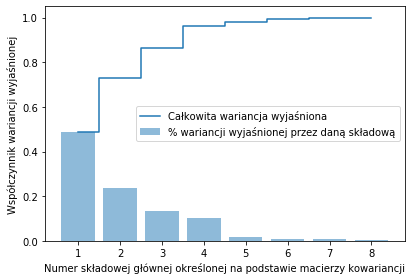

In [9]:
plt.bar(range(1, 9), variance_explained_cov, alpha=0.5, align="center",label="% wariancji wyjaśnionej przez daną składową")
plt.step(range(1, 9), total_variance_cov, where="mid",label="Całkowita wariancja wyjaśniona")
plt.ylabel("Współczynnik wariancji wyjaśnionej")
plt.xlabel("Numer składowej głównej określonej na podstawie macierzy kowariancji")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [10]:
pairs_cov = [(np.abs(eigen_values_cov[i]), eigen_vectors_cov[:, i]) for i in range(len(eigen_values_cov))] 
pairs_cov.sort(key=lambda k: k[0], reverse=True)

In [11]:
projection_matrix_cov = np.hstack((pairs_cov[0][1][:, np.newaxis], pairs_cov[1][1][:, np.newaxis], pairs_cov[2][1][:, np.newaxis],
pairs_cov[3][1][:, np.newaxis], pairs_cov[4][1][:, np.newaxis], pairs_cov[5][1][:, np.newaxis], pairs_cov[6][1][:, np.newaxis], pairs_cov[7][1][:, np.newaxis]))
print("Macierz rzutowania na podstawie macierzy kowariancji:\n")
projection_matrix_cov = pd.DataFrame(projection_matrix_cov)
projection_matrix_cov

Macierz rzutowania na podstawie macierzy kowariancji:



,0,1,2,3,4,5,6,7
0,0.048021,-0.024216,-0.886773,-0.416608,0.058494,-0.057530,-0.168602,-0.044962
1,-0.220391,0.012122,0.402555,-0.882024,-0.035220,0.089749,-0.044218,-0.003595
2,0.482752,0.076992,-0.089393,-0.117580,-0.350745,0.552020,0.532856,0.165898
3,0.489588,0.061281,0.122083,-0.062926,-0.374933,-0.252414,-0.213682,-0.698382
4,0.473191,0.024952,0.116389,-0.078539,0.837698,0.178709,-0.017919,-0.147500
5,0.490822,0.064265,0.113166,-0.096744,-0.101495,-0.421029,-0.297377,0.675868
6,-0.074964,0.701872,-0.004843,0.101116,-0.068892,0.448266,-0.533324,0.037227
7,0.077071,-0.701574,0.048078,0.070243,-0.122293,0.458314,-0.516560,0.052601


In [12]:
x_set_train_pca_cov = x_set_train_std.dot(projection_matrix_cov)

In [13]:
x_set_train_pca_cov = pd.DataFrame(x_set_train_pca_cov, columns = ["PCA_1","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7","PCA_8"])

In [14]:
x_set_train_pca_cov.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
0,-1.399098,1.105726,-1.026103,0.892028,0.051951,-0.288274,0.355947,-0.031276
1,-0.053400,0.311682,0.753549,-0.444768,-0.229013,0.291368,-0.019465,0.093861
2,-0.607769,0.250750,-0.174194,0.881742,0.103762,-0.332808,0.410875,0.024438
3,5.319496,-0.539899,0.400825,-0.107728,0.178530,0.011141,-0.147882,0.038613
4,-0.936274,-1.262006,-0.121341,-0.320778,0.018983,0.042212,-0.005626,0.046729
